In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('gold.csv')

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

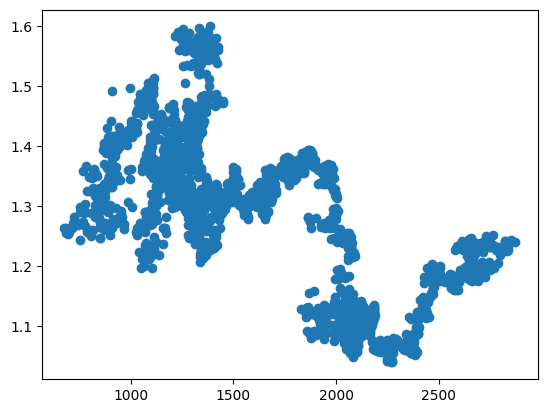

In [8]:
plt.scatter(df['SPX'], df['EUR/USD'])

In [9]:
# sns.pairplot(df)

In [10]:
# sns.pairplot(df, hue = "EUR/USD")

In [11]:
def dateProcessing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df.drop(columns = ['Date'])
    df = df.drop("Date", axis = 1)
    return df
#     df = df.drop("Date", axis = 1)

In [12]:
# df['Date1'] = pd.to_datetime(df['Date'])

In [13]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
# df['Day'] = df['Date1'].dt.day
# df['Month'] = df['Date1'].dt.month
# df['year'] = df['Date1'].dt.year

In [15]:
# df = df.apply(dateProcessing())

In [16]:
df = dateProcessing(df)

In [17]:
# df = df.drop("Date", axis = 1)

In [18]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [19]:
# df = df.drop(columns = ['Date', 'Date1'])

In [20]:
x = df.drop("EUR/USD", axis = 1)

In [21]:
y = df['EUR/USD']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44)

In [25]:
x_train_scaled = scaler.fit_transform(x_train)

In [26]:
x_test_scaled = scaler.transform(x_test)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
model = LinearRegression()

In [29]:
poly = PolynomialFeatures(degree = 5)

In [30]:
x_train_poly = poly.fit_transform(x_train_scaled)

In [31]:
x_test_poly = poly.transform(x_test_scaled)

In [32]:
model.fit(x_train_poly, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(x_test_poly)

In [34]:
from sklearn.metrics import accuracy_score, r2_score

In [35]:
r2_score(y_pred, y_test)

0.9460166614880033

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
import pickle

In [38]:
pipe = Pipeline(steps = [
    ("scaling" , scaler),
    ("polynomial_featuring", poly),
    ("model", model)
])

In [40]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('polynomial_featuring', PolynomialFeatures(degree=5)),
                ('model', LinearRegression())])

In [41]:
y_pred = pipe.predict(x_test)

In [42]:
r2_score(y_pred, y_test)

0.9460166614880033

In [43]:
with open("GoldPricePrediction.pkl", "wb") as file:
    pickle.dump(pipe, file)

In [44]:
with open("GoldPricePrediction.pkl", "rb") as file:
    model1 = pickle.load(file)

In [ ]:
model1

Pipeline(steps=[('scaling', StandardScaler()),
                ('polynomial_featuring', PolynomialFeatures(degree=5)),
                ('model', LinearRegression())])

In [ ]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [ ]:
df1 = {
    "SPX" : [1447.16],
    "GLD" : [84.57],
    "USO" : [78.47],
    "SLV" : [15.18],
    "Date" : ["2/1/2008"]
}

In [ ]:
df1 = pd.DataFrame(df1)

In [ ]:
df1

,SPX,GLD,USO,SLV,Date
0,1447.16,84.57,78.47,15.18,2/1/2008


In [ ]:
df1 = dateProcessing(df1)

In [ ]:
df1

,SPX,GLD,USO,SLV,Day,Month,Year
0,1447.16,84.57,78.47,15.18,1,2,2008


In [ ]:
pipe1.predict(df1)

array([1.45202923])